In [1]:
import torch
import torch.nn as nn # This is all the specific functions related to neural networks
import torch.optim as optim # The optim library will define our optimizer 
import torch. utils
import torch.utils.data
from torch.utils.data import Dataset, DataLoader # The very first step in the process
import torchvision
import torchvision.transforms as transforms # It will make working with these image files
import torchvision.datasets
from torchvision.datasets import ImageFolder#
import timm # Is a library for loading in architectures specific for image classifications

import matplotlib.pyplot as plt # For data vizualization
import pandas as pd ## in case we need to use those for data exploration
import numpy as np ##
import sys as sys
import tqdm
import tqdm.notebook
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version:', torch.__version__)
print('Torchvision version:', torchvision.__version__)
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)

System Version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
PyTorch version: 2.4.0+cpu
Torchvision version: 0.19.0+cpu
Numpy version: 1.26.4
Pandas version: 2.2.2


In [2]:
## Transform:
# we'll also initialize with a tranform, this is what will apply to each item in the data set and
# will only provide it a transform that will resize all the images to the same size  
## ImageFolder: from the torch Vision package, this class will take our data_dir and whatever
# transform we provide it, this loader it'll assume that any subfolders in that folder have the
# class name for the image and it'll handle creating all the labels for us
class PlayingCardDataset(Dataset):
    ## Init: it tell us what this class to do when it's created
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
   
    # the dataloader will need to know how many examples we have in a data once we create it
    def __len__(self):
        return len(self.data)
    
    ## GetItem: this method takes in an index location in our data set and we'll return one item
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    ## it'll return the data classes form this ImageFolder 
    def classes(self):
        return self.data.classes 


In [3]:
dataset = PlayingCardDataset( data_dir='/kaggle/input/cards-image-datasetclassification/train')

In [4]:
len(dataset)

7624

In [5]:
# test the GetItem methos, by valling this data set on one of these index locations,
# it should work anywhere between 0 and 7623 (this is the gange of 7624) it'll return us a topple 
# which contains the image and then the class which is a number between 0 and 52 (total number of classes = 53)
dataset[6000]

(<PIL.Image.Image image mode=RGB size=224x224>, 41)

In [6]:
# we also could call it like this where we would pull out from this topple the image, and then the label
image, label = dataset[6000]
print(label)

41


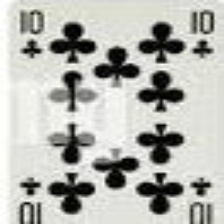

In [7]:
image

In [8]:
# Get a dictionary associating target values with folder names
data_dir = '/kaggle/input/cards-image-datasetclassification/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)
#check in the output below the '41' and verify it with the example above

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [9]:
# We need to ensure that our data set outputs all of these images in the same size, because
# the model will expect the input to always be consistent
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

data_dir = '/kaggle/input/cards-image-datasetclassification/train'
dataset = PlayingCardDataset(data_dir, transform)

In [10]:
# and if we call one of the values in the index, we can see we have out image and our label,
# but now our image is a pytorch tensor
dataset[100]

(tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
          [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
          ...,
          [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
          [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
          [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
          ...,
          [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
          [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],
 
         [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
          [0.0118, 0.0196, 0.3137,  ...,

In [11]:
image, label = dataset[100]
# to get an idea of the size of the 3D tensor and it's in 128 by 128 (because we've resized it)
# and the 3 here is the number of channles that's a red green and blue channels of the image
image.shape

torch.Size([3, 128, 128])

In [12]:
# we can iterate over this data set and we'll just have it break out after the first time we run
# it but since the data set is in iterable we can call this loop and run over each image and label
for image, label in dataset:
    break

In [13]:
## Batch Size tells us how many of these examples we should pull each time we iterate over the data loader
## Shuffle: allows us to tell the data loader that every time we load a new example from our
#dataa set, if we want that to be pulled randomply or in order. Shuffling is typical done 
#when training the data but you don't need to suffle the data when you're running it on a test set or a validation set
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [14]:
for images, labels in dataloader:
    break

# if we look now at the images it's a tensor just like before
images

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9922, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 1.0000,  ..., 0.9922, 0.9882, 0.9843],
          [0.9725, 0.9843, 0.9961,  ..., 0.9961, 0.9843, 0.8431]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9922, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 1.0000,  ..., 0.9922, 0.9882, 0.9843],
          [0.9725, 0.9843, 0.9961,  ..., 0.9961, 0.9843, 0.8431]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9922, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1

In [15]:
# but the shape of it is 32x3x128x128 instead of 3x128x128, that's because out data set
# has batched into 32 examples abd our labels is a pytorch tensor with one dimension that has
# 32 different labels 
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [16]:
# because we put shuffle here and we know that the labels were in order of the original dataset
# if we just look at these labels now we can see that they're random and each time that we run
# this they should be a random order of the labels
labels

tensor([12, 43, 33, 42,  9,  3,  3, 40, 48, 30, 26, 20, 44,  0, 21, 49, 14, 41,
        19,  9, 10,  4,  5, 17, 23, 39, 22,  0, 17, 12, 13,  0])

In [17]:
## By setting pre-train to true we're saying that the model weights within this model have
# already been trained on the image net data set
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        # this line of the code will initialize this object with all everything from the parent class
        super(SimpleCardClassifer, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=False)
        # because this base model actually has an additional layer that we want to remove we're
        # just going to remove that last layer with this line of code, it's like we're cutting
        # off the very end of this Timm model so that we can instead have it output at our classifier level
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        
        # this depends on the model but the efficientnet_b0 by default will output a feature
        # size of 1280 and we're going to need to take this output size and resize it to our
        # number of classes
        enet_out_size = 1280
        # Make a classefier
        self.classifier = nn.Linear(enet_out_size, num_classes)
    
    def forward(self, x):
        # We take in an example or a batch of examples and we connect all these parts we
        # defined on the top and return our output
        y = self.features(x)
        output = self.classifier(y)
        return output

In [18]:
model = SimpleCardClassifer(num_classes=53)

In [19]:
print(str(model)[:500])

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fal


In [20]:
# we can test our model just to make sure the input and output or what is expected by providing
# it now those images from one example batch
model(images)

tensor([[ 0.0710, -0.0249, -0.2170,  ..., -0.0090,  0.1978, -0.0766],
        [ 0.4805,  0.2858, -0.5320,  ...,  0.9204,  0.4453, -0.3052],
        [ 0.0381,  0.1100, -0.0790,  ..., -0.0627,  0.0449, -0.0576],
        ...,
        [ 0.0459,  0.1216, -0.0921,  ..., -0.0526,  0.0855, -0.1002],
        [ 0.0165,  0.1054, -0.0784,  ..., -0.0872,  0.0401, -0.0720],
        [ 0.0311,  0.1167, -0.0950,  ..., -0.0729,  0.0257, -0.0378]],
       grad_fn=<AddmmBackward0>)

In [21]:
example_out = model(images)
example_out.shape #this is our [batch_size, num_classes]
# the results that we expects are mean that for each of these examples will have probabilities
# for each class

torch.Size([32, 53])

Step 3. The training loop

Now that we understand the general paradigm of pytorch datasets and models, we need to
create the prosses of training this model.

Some things to consider: We want to validate our model on data it has not been trained on, so usually we split in to a train and validate datasets. This is because we can just create two datasets using our existing class
  * Terms:
       * Epoch: One run through the entire training dataset
       * Step: One bach of data as defined in our dataloader

This loop is one you will become familiar with when training models, you load in data to the model in batches - then calculate the loss and perform backpropagation. There are packages that package this for you, but it's good to have at least written it once to understand how it works.

Two things to select:
  * optimizer, adam is the best place to start for most tasks
  * loss function: What the model will optimize for   

In [22]:
# Loss function, here we have a classification task and Cross Entropy loss is a common loss
# function used for this type of case
criterion = nn.CrossEntropyLoss()
# Optimizer, this optimizer needs to take in our model parameters and a learning rate (lr)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
# just checking to make sure this loss function does work with the input data that we have
# and the output from the model. Now the model hasn't learned anything yet so the loss is going
# to be pretty high
criterion(example_out, labels)

tensor(3.9498, grad_fn=<NllLossBackward0>)

In [24]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

train_folder = '/kaggle/input/cards-image-datasetclassification/train'
valid_folder = '/kaggle/input/cards-image-datasetclassification/valid'
test_folder = '/kaggle/input/cards-image-datasetclassification/test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [26]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [27]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
import torch
print(torch.__version__)
print(torch.version.cuda)

False
0
2.4.0+cpu
None


In [28]:
!apt-get install cuda




E: Unable to locate package cuda


In [29]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
import torch
print(torch.__version__)
print(torch.version.cuda)

False
0
2.4.0+cpu
None


In [30]:
import torch
print(torch.cuda.is_available())

False


In [31]:
# Simple training loop
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Assuming you already have your model, criterion, optimizer, and data loaders set up

num_epochs = 25  # Number of total epochs
patience = 10  # Number of epochs to wait for improvement before stopping
min_lr = 1e-6  # Minimum learning rate for scheduler

train_losses, val_losses = [], []
# Create an optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create a scheduler for learning rate reduction
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=5, min_lr=min_lr, verbose=True)

best_val_loss = float('inf')
early_stopping_counter = 0

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    
    # Validation Phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
    val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    
    # Print epoch statistics
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss:.6f}, Validation loss: {val_loss:.6f}")
    
    # Step the scheduler based on validation loss
    scheduler.step(val_loss)
    
    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0  # Reset counter if validation loss improves
    else:
        early_stopping_counter += 1
    
    if early_stopping_counter >= patience:
        print("Early stopping triggered!")
        break


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/25 - Train loss: 3.221690, Validation loss: 2.412715
Epoch 2/25 - Train loss: 2.136899, Validation loss: 1.562687
Epoch 3/25 - Train loss: 1.639806, Validation loss: 1.242366
Epoch 4/25 - Train loss: 1.245948, Validation loss: 1.035512
Epoch 5/25 - Train loss: 0.982897, Validation loss: 0.963490
Epoch 6/25 - Train loss: 0.795189, Validation loss: 0.978885
Epoch 7/25 - Train loss: 0.563267, Validation loss: 0.985488
Epoch 8/25 - Train loss: 0.467372, Validation loss: 0.920577
Epoch 9/25 - Train loss: 0.355677, Validation loss: 1.086166
Epoch 10/25 - Train loss: 0.278551, Validation loss: 1.106693
Epoch 11/25 - Train loss: 0.224782, Validation loss: 0.945602
Epoch 12/25 - Train loss: 0.236224, Validation loss: 1.115071
Epoch 13/25 - Train loss: 0.223904, Validation loss: 1.017266
Epoch 14/25 - Train loss: 0.187835, Validation loss: 1.188640
Epoch 15/25 - Train loss: 0.067660, Validation loss: 0.938768
Epoch 16/25 - Train loss: 0.019781, Validation loss: 0.872772
Epoch 17/25 - Tra

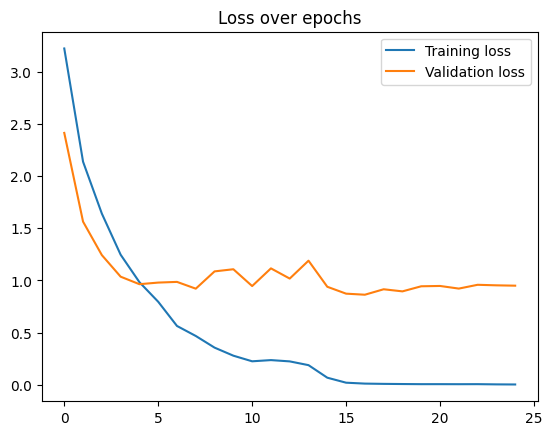

In [32]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

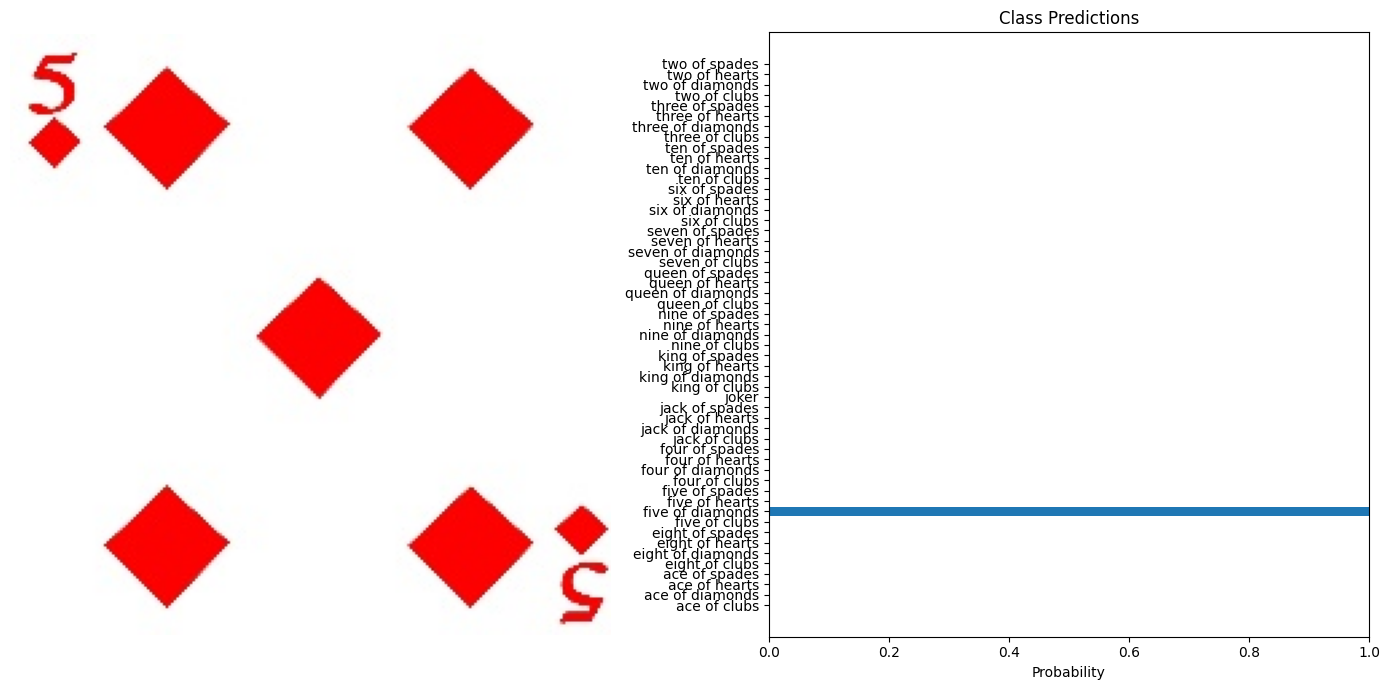

In [33]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)
    
    plt.tight_layout()
    plt.show()
    
# Example usage
test_image = '/kaggle/input/cards-image-datasetclassification/test/five of diamonds/2.jpg'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes
visualize_predictions(original_image, probabilities, class_names)

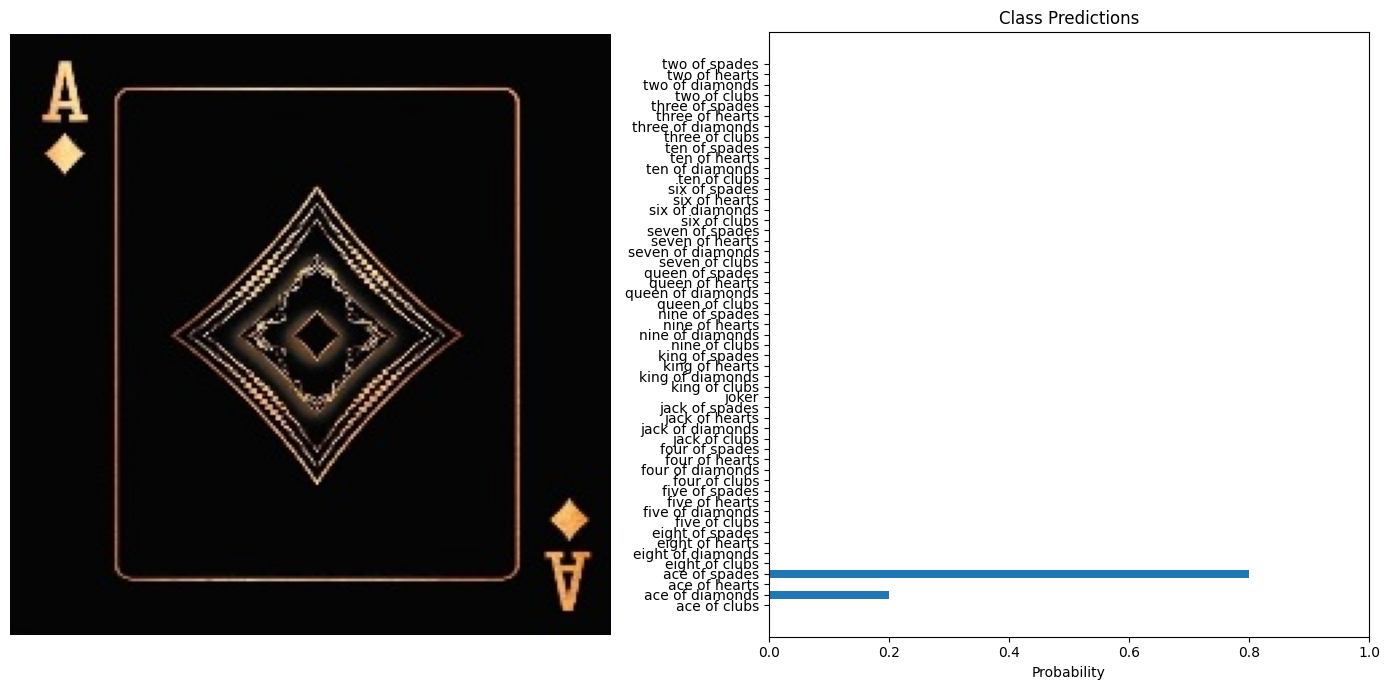

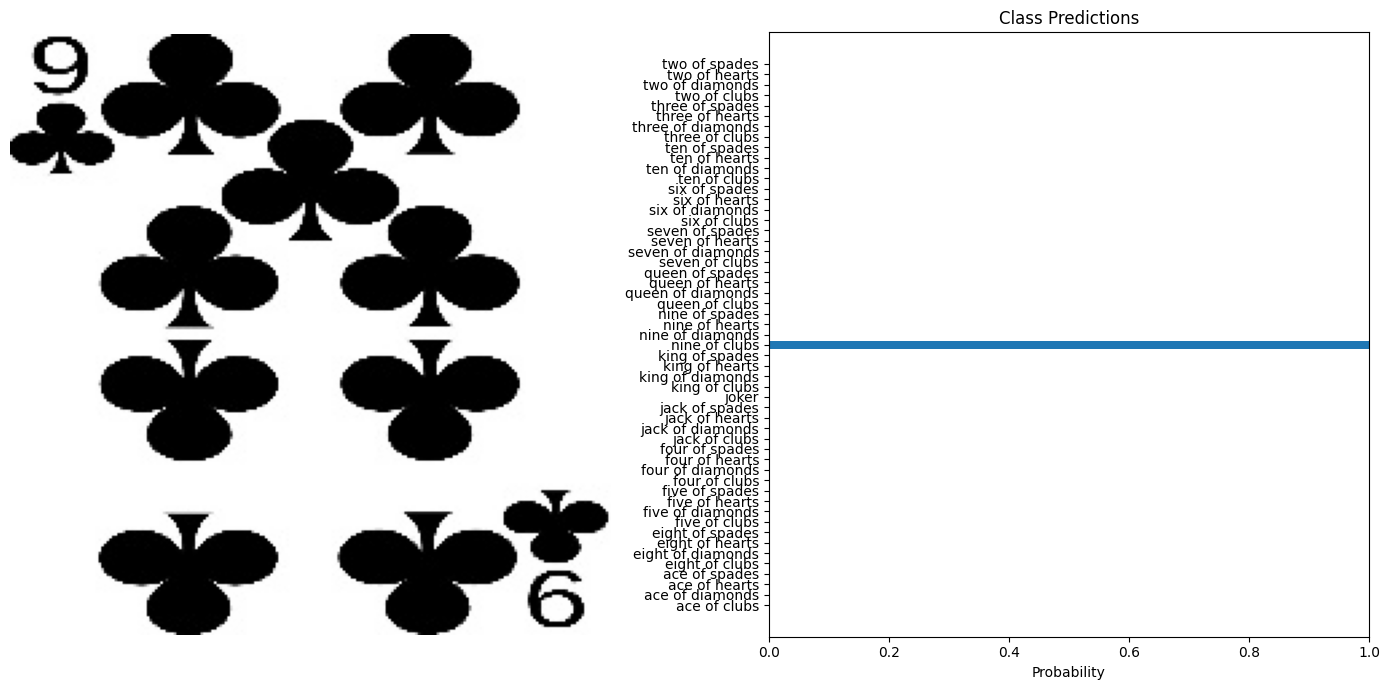

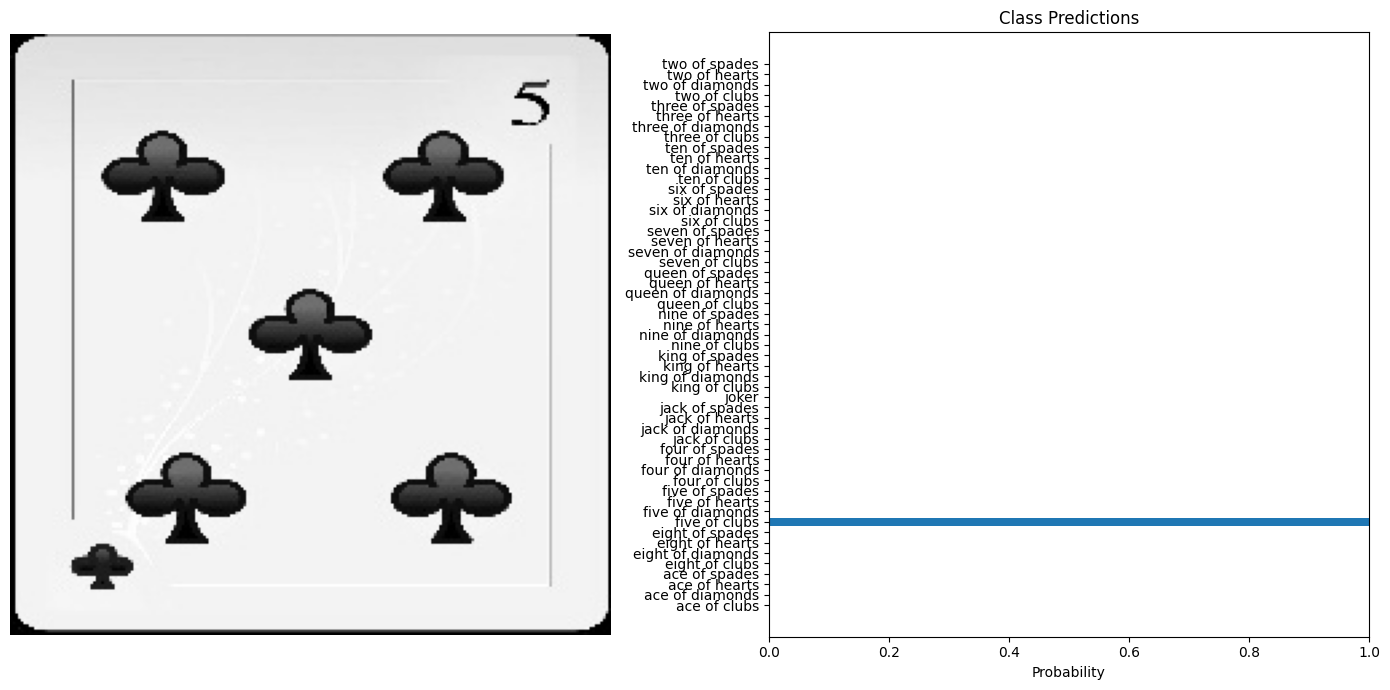

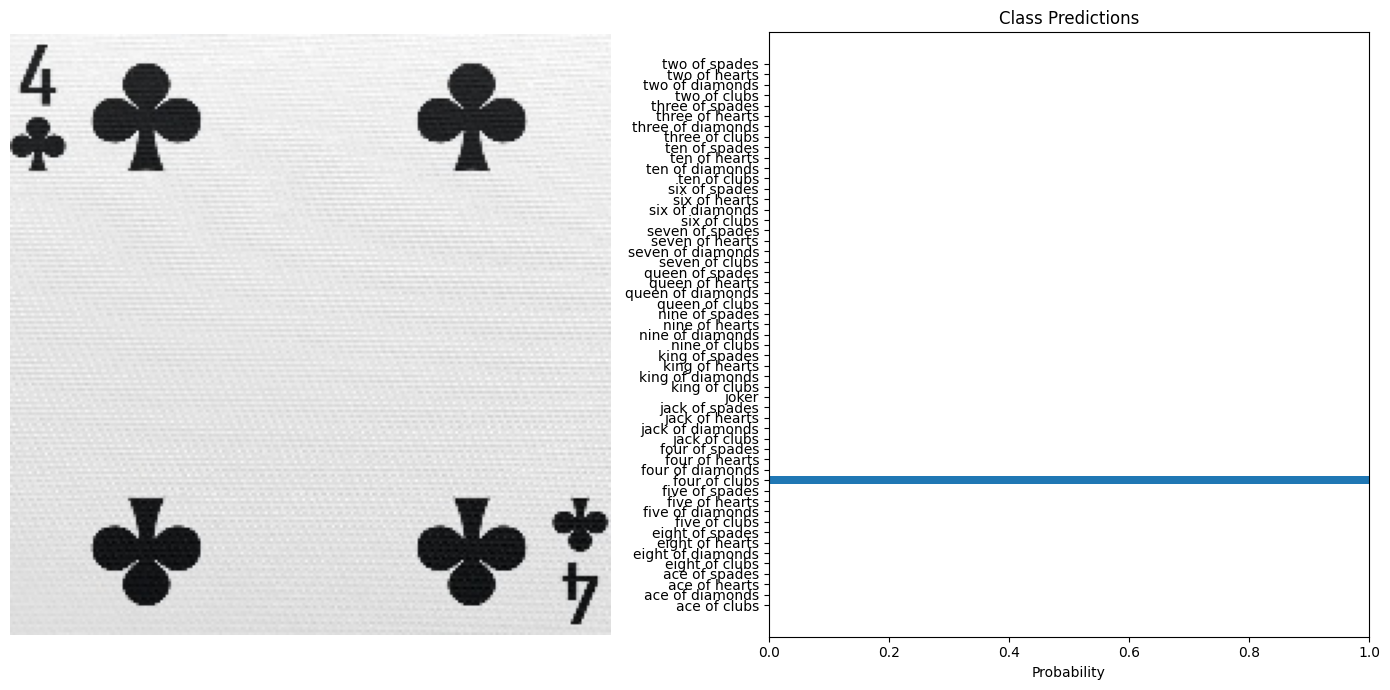

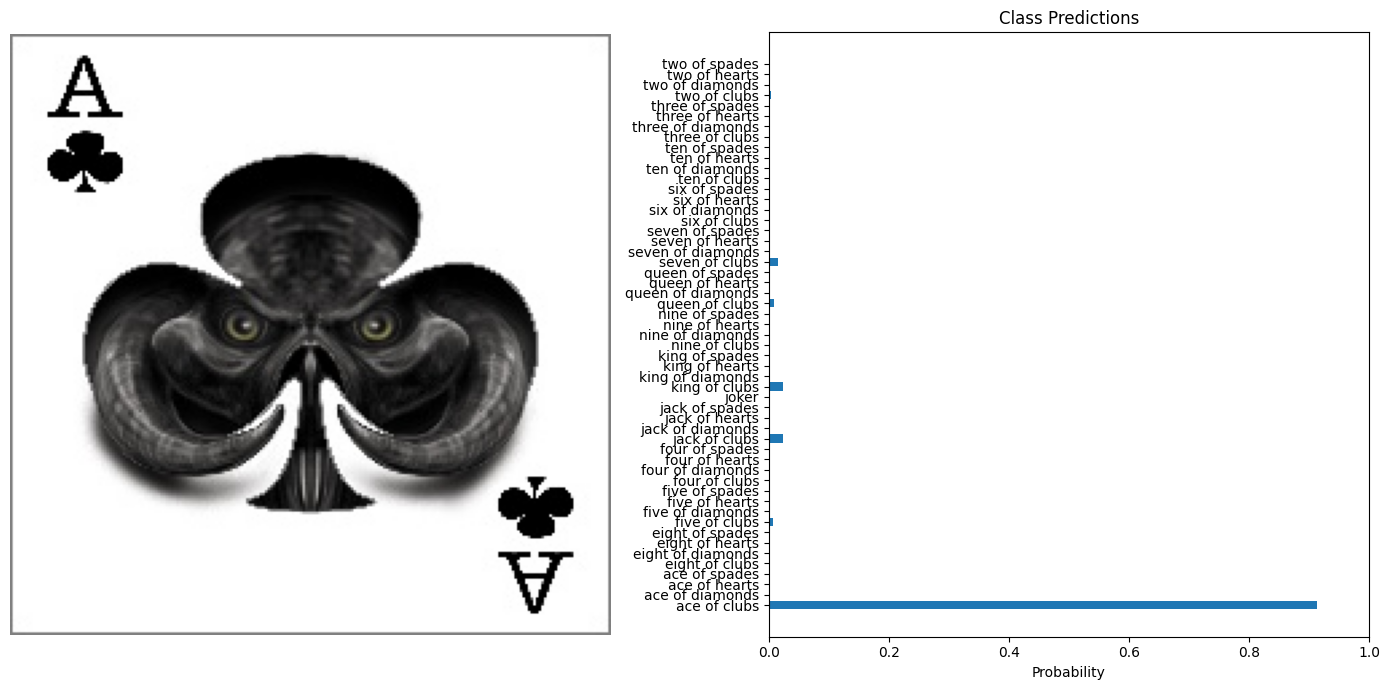

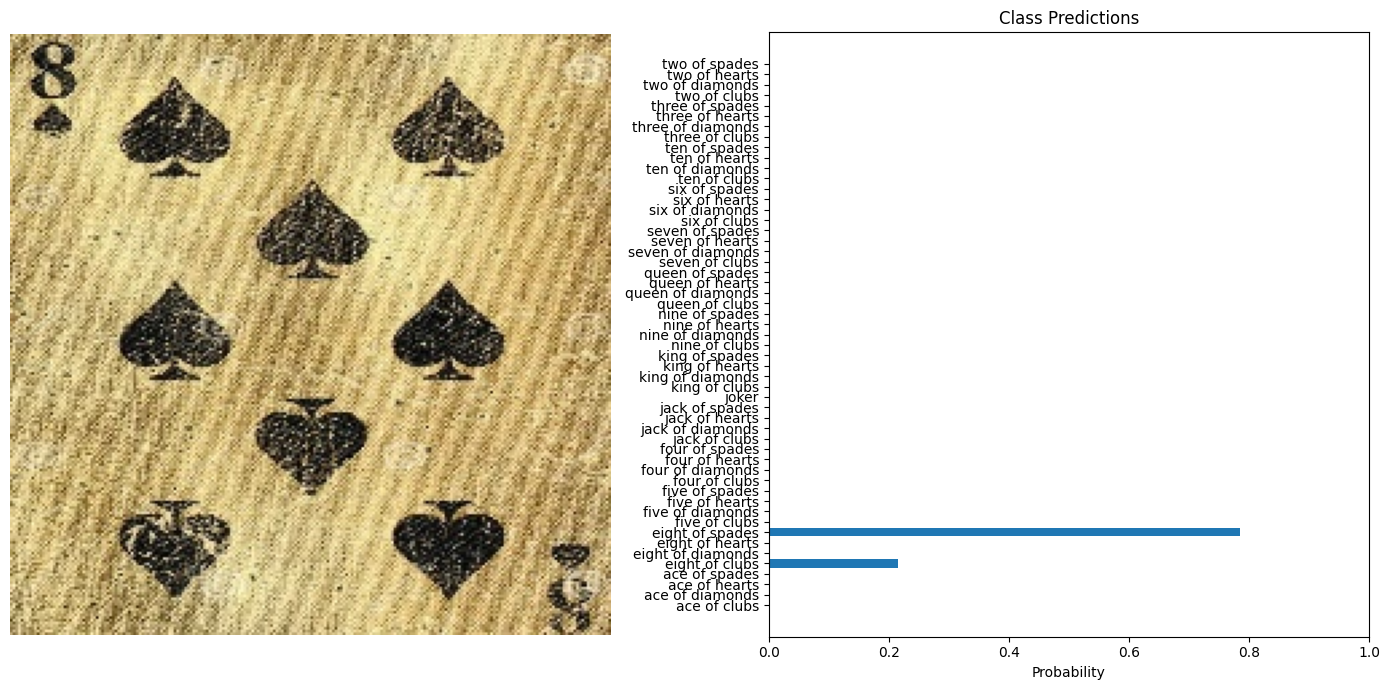

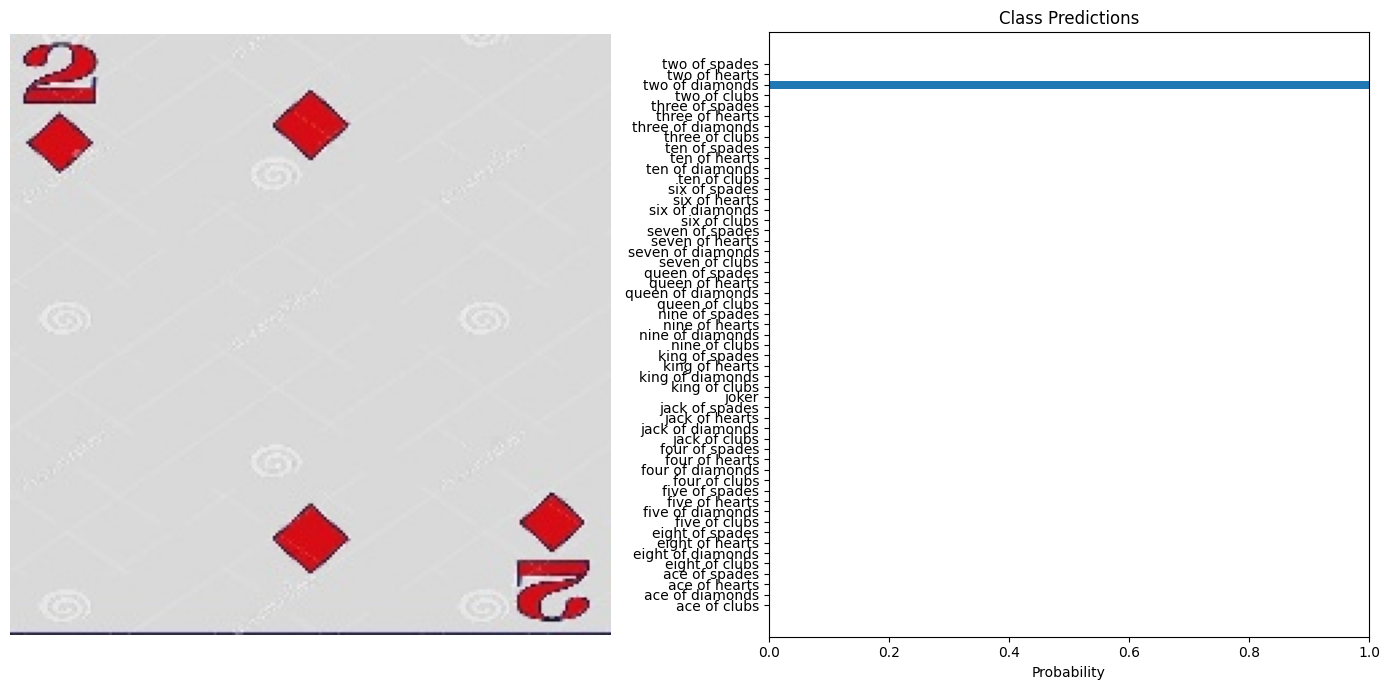

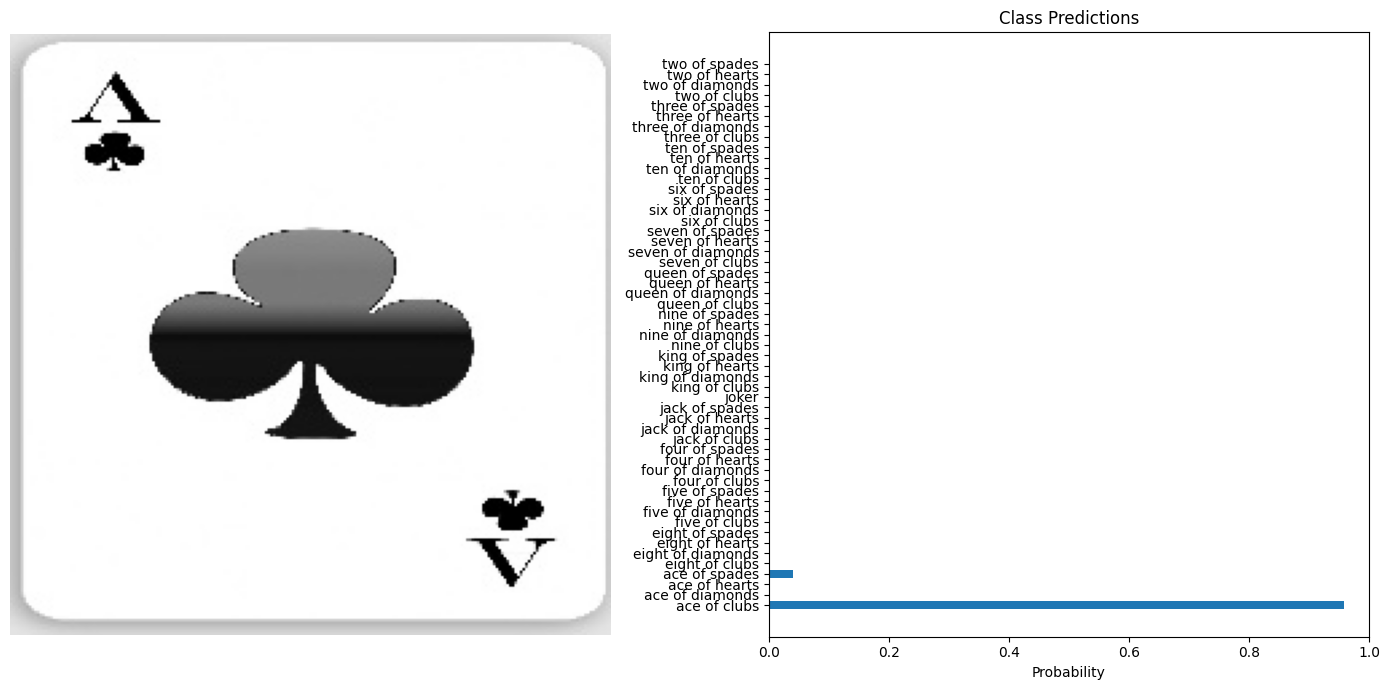

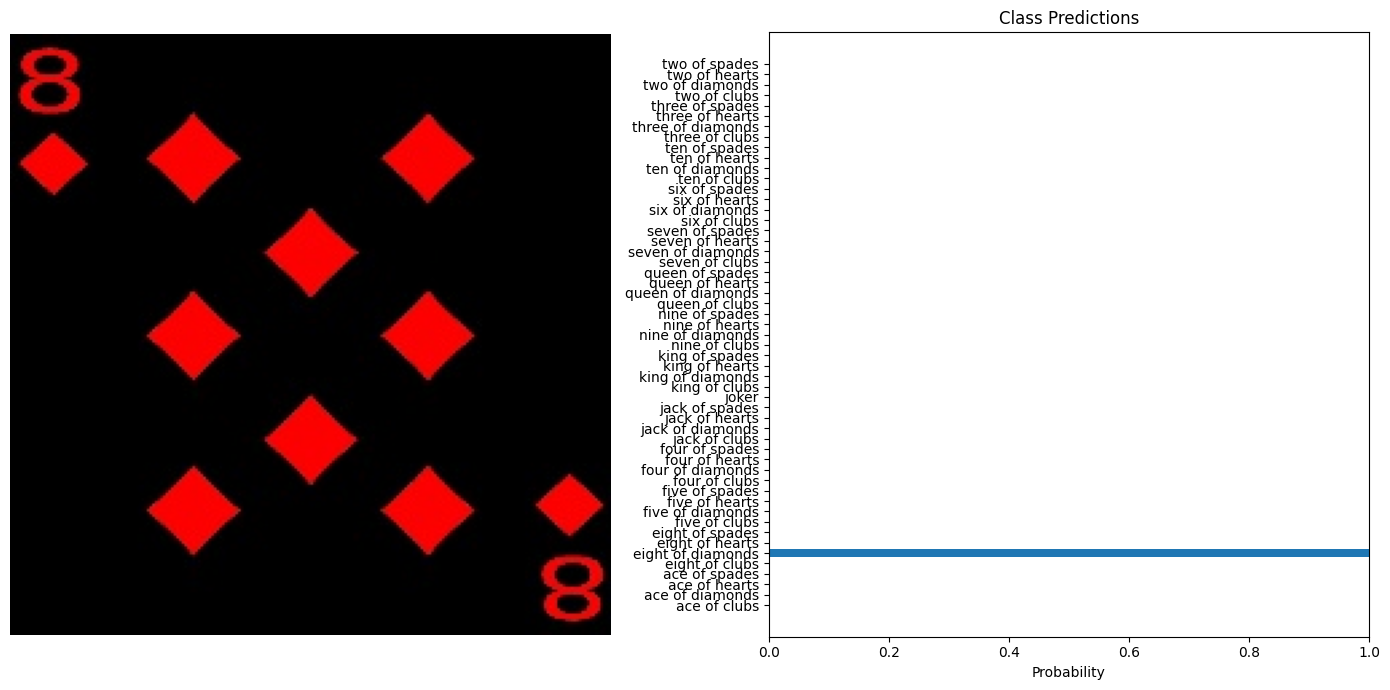

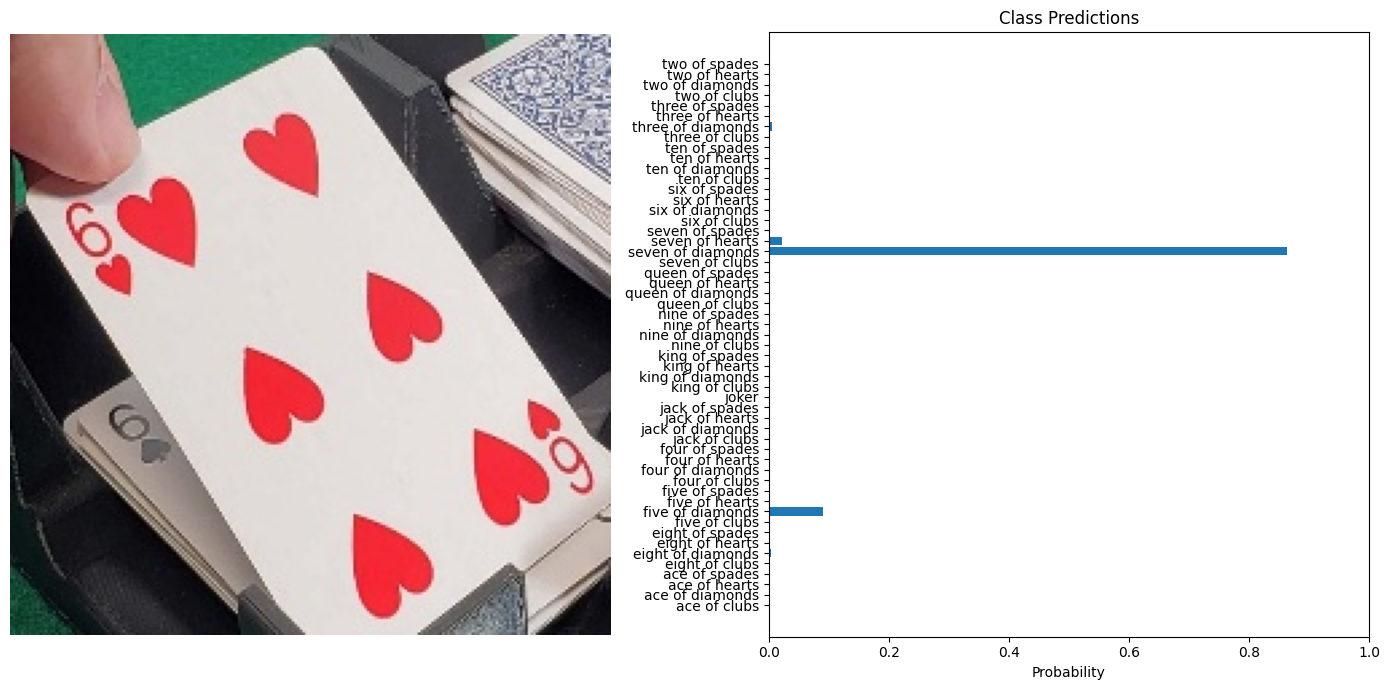

In [34]:
from glob import glob
test_images = glob('../input/cards-image-datasetclassification/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)
    
    # Assuming dataset.classes gives the class names
    class_names = dataset.classes
    visualize_predictions(original_image, probabilities, class_names)